<a href="https://colab.research.google.com/github/ask-ajay/SparkML_Activity/blob/main/SparkML_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount G Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


List contents

In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/Bigdata'

23-Oct	29-Oct	india.txt  temp_data.txt  test.csv  train.csv


In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/Bigdata/29-Oct'

20221029_B120_CSE5225_SparkML_Activity.ipynb  bank_data.csv


# Running PySpark on Google Colab

There is a full Ubuntu container running on Colaboratory and users are given with the root access. With the root access, users can install any packages or software.

In order to work with PySpark on Google Colab,

Install dependencies such as Java and Spark.
Set the Environment variables (paths).
Start the Spark Session.

# Install dependencies

To run Spark on Google Colab, first one need to install all the necessary dependencies such as required version of Apache Spark with relevant Hadoop version, Java 8 and findspark package to locate the spark in the environment.

These packages can be installed inside the Jupyter notebook of the Google Colab.

PySpark isn't on sys.path by default, but that doesn't mean it can't be used as a regular library. You can address this by either symlinking pyspark into your site-packages, or adding pyspark to sys.path at runtime. findspark does the latter.

This may take some time to run.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://archive.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar xf /content/spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark

--2022-10-29 04:01:32--  https://archive.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235899716 (225M) [application/x-gzip]
Saving to: ‘spark-2.4.8-bin-hadoop2.7.tgz’

spark-2.4.8-bin-had 100%[===================>] 224.97M  22.5MB/s    in 9.7s    

2022-10-29 04:01:42 (23.2 MB/s) - ‘spark-2.4.8-bin-hadoop2.7.tgz’ saved [235899716/235899716]



In [ ]:
!ls

drive  sample_data  spark-2.4.8-bin-hadoop2.7  spark-2.4.8-bin-hadoop2.7.tgz


# Set Environment Variables

Java and Spark were installed, set these environment’s path that allows us to run PySpark in our Google Colab environment.

To set the location of Java and Spark, run the below code.

In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"

# Start a SparkSession

This will start a local Spark session

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder\
       .master("local[*]")\
       .appName("SparkMLActivity")\
       .getOrCreate()

# Use Spark!

That's all there is to it - you're ready to use Spark!

In [ ]:
spark

In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=2c8ab6ae38fc5f9dfe686971c0717403f649aeb778d07b1a2864167429b4ac6e
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [ ]:
import numpy as np
import pandas as pd
from io import StringIO

Define the dataset schema

In [ ]:
bankDataSchema = StructType([
                 StructField("seqId",IntegerType(),True),
                 StructField("age",IntegerType(),True),
                 StructField("job",StringType(),True),
                 StructField("maritalStatus",StringType(),True),
                 StructField("education",StringType(),True),
                 StructField("default",StringType(),True),
                 StructField("balance",DoubleType(),True),
                 StructField("housing",StringType(),True),
                 StructField("loan",StringType(),True),
                 StructField("contact",StringType(),True),
                 StructField("day",IntegerType(),True),
                 StructField("month",StringType(),True),
                 StructField("duration",DoubleType(),True),
                 StructField("campaign",DoubleType(),True),
                 StructField("pdays",DoubleType(),True),
                 StructField("previous",DoubleType(),True),
                 StructField("poutcome",StringType(),True),
                 StructField("opened_new_td_act_yes_no",StringType(),True)
])

# Load the Data from a File into a DataFrame

The first step is to load our data into a DataFrame. In the following code, we specify the data source and schema to load into a dataset.

In [ ]:
bankDF = spark.read.format('csv')\
        .option('header','false')\
        .option('inferSchema','true')\
        .load("/content/drive/My Drive/Colab Notebooks/Bigdata/29-Oct/bank_data.csv",
              schema=bankDataSchema)

In [ ]:
%time
pdf = pd.DataFrame(np.random.rand(100,3))
sparkdf = spark.createDataFrame(pdf)

result_df = sparkdf.select("*").toPandas()
result_df.head()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


,0,1,2
0,0.502858,0.288458,0.217275
1,0.553651,0.729350,0.382058
2,0.269313,0.746263,0.041392
3,0.911900,0.561637,0.113030
4,0.064319,0.610172,0.889689


In [ ]:
%time
spark.conf.set("spark.sql.execution.arrow.enabled","false")
pdf = pd.DataFrame(np.random.rand(100,3))
sparkdf = spark.createDataFrame(pdf)

result_df = sparkdf.select("*").toPandas()
result_df.head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


,0,1,2
0,0.280724,0.037822,0.882365
1,0.546126,0.826241,0.220573
2,0.952488,0.198431,0.931833
3,0.424906,0.190553,0.441329
4,0.919536,0.193353,0.302904


# EDA

## Data schema

In [ ]:
bankDF.printSchema()

root
 |-- seqId: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- maritalStatus: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: double (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: double (nullable = true)
 |-- pdays: double (nullable = true)
 |-- previous: double (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- opened_new_td_act_yes_no: string (nullable = true)



## Data types

In [ ]:
bankDF.dtypes

[('seqId', 'int'),
 ('age', 'int'),
 ('job', 'string'),
 ('maritalStatus', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'double'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'double'),
 ('campaign', 'double'),
 ('pdays', 'double'),
 ('previous', 'double'),
 ('poutcome', 'string'),
 ('opened_new_td_act_yes_no', 'string')]

## Sample data

In [ ]:
bankDF.show(3)

+-----+---+----------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|seqId|age|       job|maritalStatus|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+-----+---+----------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 1001| 30|unemployed|      married|  primary|     no| 1787.0|     no|  no|cellular| 19|  oct|    79.0|     1.0| -1.0|     0.0| unknown|                      no|
| 1002| 33|  services|      married|secondary|     no| 4789.0|    yes| yes|cellular| 11|  may|   220.0|     1.0|339.0|     4.0| failure|                      no|
| 1003| 35|management|       single| tertiary|     no| 1350.0|    yes|  no|cellular| 16|  apr|   185.0|     1.0|330.0|     1.0| failure|                      no|
+-----+---+----------+------

## Cache dataframe

In [ ]:
bankDF.cache()

DataFrame[seqId: int, age: int, job: string, maritalStatus: string, education: string, default: string, balance: double, housing: string, loan: string, contact: string, day: int, month: string, duration: double, campaign: double, pdays: double, previous: double, poutcome: string, opened_new_td_act_yes_no: string]

In [ ]:
bankDF.take(2)

[Row(seqId=1001, age=30, job='unemployed', maritalStatus='married', education='primary', default='no', balance=1787.0, housing='no', loan='no', contact='cellular', day=19, month='oct', duration=79.0, campaign=1.0, pdays=-1.0, previous=0.0, poutcome='unknown', opened_new_td_act_yes_no='no'),
 Row(seqId=1002, age=33, job='services', maritalStatus='married', education='secondary', default='no', balance=4789.0, housing='yes', loan='yes', contact='cellular', day=11, month='may', duration=220.0, campaign=1.0, pdays=339.0, previous=4.0, poutcome='failure', opened_new_td_act_yes_no='no')]

In [ ]:
len(bankDF.columns)

18

In [ ]:
bankDF.count()

4521

## Remove the seqId column.

In [ ]:
bankDF = bankDF.drop('seqId')

In [ ]:
len(bankDF.columns)

17

## Summary Statistics
Spark DataFrames include some `built-in functions` for statistical processing. The `describe()` function performs summary statistics calculations on numeric columns and returns them as a DataFrame. The following code shows some statistics for the label and some features.

In [ ]:
bankDF.describe().show()

+-------+------------------+-------+-------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+------------------------+
|summary|               age|    job|maritalStatus|education|default|           balance|housing|loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|opened_new_td_act_yes_no|
+-------+------------------+-------+-------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+------------------------+
|  count|              4521|   4521|         4521|     4521|   4521|              4521|   4521|4521|    4521|              4521| 4521|              4521|              4521|              4521|              4521|    4521|                    4521|
|   mean| 41.1700951

In [ ]:
bankDF.describe().select('summary','age','loan','balance','pdays').show()

+-------+------------------+----+------------------+------------------+
|summary|               age|loan|           balance|             pdays|
+-------+------------------+----+------------------+------------------+
|  count|              4521|4521|              4521|              4521|
|   mean| 41.17009511170095|null|1422.6578190665782|39.766644547666445|
| stddev|10.576210958711263|null|3009.6381424673395|100.12112444301656|
|    min|                19|  no|           -3313.0|              -1.0|
|    max|                87| yes|           71188.0|             871.0|
+-------+------------------+----+------------------+------------------+



In [ ]:
bankDF.agg(*(min(col(c)).alias(c) for c in bankDF.columns)).show()

+---+------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|   job|maritalStatus|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19|admin.|     divorced|  primary|     no|-3313.0|     no|  no|cellular|  1|  apr|     4.0|     1.0| -1.0|     0.0| failure|                      no|
+---+------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+



In [ ]:
bankDF.where(bankDF.balance < 0).count()

366

In [ ]:
from pyspark.sql.functions import when
bankDF = bankDF.withColumn('balance',
                           when(bankDF.balance>0, bankDF.balance)\
                           .otherwise(0))
#
zerobalanceDF = bankDF.where(bankDF.balance < 0)
zerobalanceDF.count()

0

Register SQL Table.

In [ ]:
bankDF.createOrReplaceTempView('bankDFTable')

In [ ]:
resultDF = spark.sql("""
 SELECT opened_new_td_act_yes_no, COUNT(*) AS count
 FROM bankDFTable
 GROUP BY opened_new_td_act_yes_no
""")

In [ ]:
resultDF.show()

+------------------------+-----+
|opened_new_td_act_yes_no|count|
+------------------------+-----+
|                      no| 4000|
|                     yes|  521|
+------------------------+-----+



In [ ]:
bankDF.groupBy("opened_new_td_act_yes_no").count().show()

+------------------------+-----+
|opened_new_td_act_yes_no|count|
+------------------------+-----+
|                      no| 4000|
|                     yes|  521|
+------------------------+-----+



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio
import plotly
chart_studio.tools.set_credentials_file(username='kirankumarinsofe',
                                        api_key='JNyhUZiZrgFQ6LUjEGgG')
import plotly.figure_factory as ff
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objects as go
import warnings

### Initialize settings
sns.set_style('whitegrid')
sns.set(color_codes=True)
warnings.filterwarnings('ignore')
pyoff.init_notebook_mode(connected=True)
get_ipython().magic('matplotlib inline')

In [ ]:
pdDF = resultDF.toPandas()
data = [
        go.Bar(
            x=pdDF['opened_new_td_act_yes_no'],
            y=pdDF['count']
        )

]
layout = go.Layout(title='Term Deposit Yes/No Counts')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,fileName='20221029_1')

Other variables that could be considered for exploratory data analysis
* loan vs opened_new_td_act_yes_no
* marital_status vs opened_new_td_act_yes_no
* job vs opened_new_td_act_yes_no
* education
* marital status

In [ ]:
resultDF = bankDF.crosstab('opened_new_td_act_yes_no','loan')
resultDF.show()

+-----------------------------+----+---+
|opened_new_td_act_yes_no_loan|  no|yes|
+-----------------------------+----+---+
|                          yes| 478| 43|
|                           no|3352|648|
+-----------------------------+----+---+



## Convert to pandas dataframe

In [ ]:
pdDF = resultDF.toPandas()

In [ ]:
pdDF.columns = ['opened_new_td_act_yes_no_loan','No_Existing_loan','Existing_loan']

In [ ]:
data = [
     go.Bar(
            x=['Opted_for_loan','No_opted_loan'],
            y=pdDF['No_Existing_loan'],
            name='No Existing Loans'
        ),
     go.Bar(
         x = ['Opted_for_loan','No_opted_loan'],
         y = pdDF['Existing_loan'],
         name = 'Existing Loans'
     )
]
layout=go.Layout(
    title='Exsiting/Non-existing loans - Counts',
    barmode='group'
)
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
### For different job categories
resultDF = spark.sql("""
SELECT
   job,
   COUNT(*) AS term_deposit_yes_cnt
   FROM bankDFTable
   WHERE opened_new_td_act_yes_no = "yes"
   GROUP BY job
""")

In [ ]:
pdDF = resultDF.toPandas()
data = [
       go.Bar(
           x = pdDF['job'],
           y = pdDF['term_deposit_yes_cnt']
       )
]
layout = go.Layout(title="Term deposit counts in each job category")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
### For different job categories
resultDF = spark.sql("""
SELECT
   job,
   COUNT(*) AS term_deposit_no_cnt
   FROM bankDFTable
   WHERE opened_new_td_act_yes_no = "no"
   GROUP BY job
""")

In [ ]:
pdDF = resultDF.toPandas()
data = [
       go.Bar(
           x = pdDF['job'],
           y = pdDF['term_deposit_no_cnt']
       )
]
layout = go.Layout(title="Term deposit counts in each job category")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
resultDF = bankDF.filter(expr("opened_new_td_act_yes_no='yes'")).groupBy("education").count()
resultDF.show()

+---------+-----+
|education|count|
+---------+-----+
|  unknown|   19|
| tertiary|  193|
|secondary|  245|
|  primary|   64|
+---------+-----+



In [ ]:
pdDF = resultDF.toPandas()
data = [
      go.Bar(
          x = pdDF['education'],
          y = pdDF['count']
      )
]
layout = go.Layout(title="Term deposit opted count in each education level")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
pdDF = resultDF.toPandas()
data = [
      go.Bar(
          x = pdDF['education'],
          y = pdDF['count']
      )
]
layout = go.Layout(title="Term deposit opted count in each education level")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
resultDF = spark.sql("""
SELECT
  maritalStatus as marital_status,
  COUNT(*) AS loan_denied
FROM bankDFTable
WHERE opened_new_td_act_yes_no = 'no'
GROUP BY maritalStatus
""")

resultDF.show()

+--------------+-----------+
|marital_status|loan_denied|
+--------------+-----------+
|      divorced|        451|
|       married|       2520|
|        single|       1029|
+--------------+-----------+



In [ ]:
pdDF = resultDF.toPandas()
data = [
      go.Bar(
          x = pdDF['marital_status'],
          y = pdDF['loan_denied']
      )
]
layout = go.Layout(title="Term deposit denied count in each marital status level")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
bankDF_pd = bankDF.toPandas()
bankDF_pd.head()

,age,job,maritalStatus,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,opened_new_td_act_yes_no
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220.0,1.0,339.0,4.0,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1.0,330.0,1.0,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1.0,-1.0,0.0,unknown,no


## Correlations

In [ ]:
correlations = bankDF_pd.corr()
correlations

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.084202,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.084202,1.000000,-0.007595,-0.015195,-0.010840,0.008616,0.026031
day,-0.017853,-0.007595,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015195,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.010840,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.008616,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026031,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [ ]:
trace = go.Heatmap(z=[correlations['age'],correlations['balance'],
                      correlations['day'],correlations['duration'],
                      correlations['campaign'],
                      correlations['pdays'],correlations['previous']],
                   x = ['age','balance','day','duration','campaign','pdays','previous'],
                   y = ['age','balance','day','duration','campaign','pdays','previous'])
data = [trace]
layout = go.Layout(title='HeatMap')
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

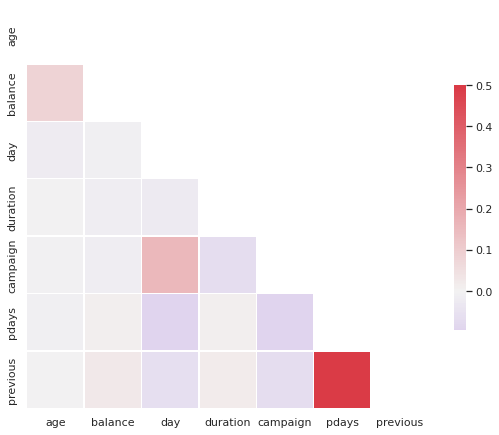

In [ ]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1000, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
bankDF.select([count(when(isnan(c) | col(c).isNull(), c).otherwise(None))\
               .alias(c) for c in bankDF.columns])\
               .show()

+---+---+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|job|maritalStatus|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+---+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|  0|  0|            0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|                       0|
+---+---+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+



In [ ]:
data_df = bankDF.na.drop(how="any")
#
print("Count of the records in the datset before dropping null values",
      bankDF.count())
#
print("Count of the records in the dataset after dropping null values",
      data_df.count())

Count of the records in the datset before dropping null values 4521
Count of the records in the dataset after dropping null values 4521


# Data pre-processing

## Train, Test splits

In [ ]:
(train_data, test_data) = bankDF.randomSplit([0.7,0.3])

In [ ]:
train_data.show(4)

+---+-------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|    job|maritalStatus|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+-------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19|student|       single|  primary|     no|  103.0|     no|  no| cellular| 10|  jul|   104.0|     2.0| -1.0|     0.0| unknown|                     yes|
| 19|student|       single|secondary|     no|  302.0|     no|  no| cellular| 16|  jul|   205.0|     1.0| -1.0|     0.0| unknown|                     yes|
| 20|student|       single|secondary|     no|  291.0|     no|  no|telephone| 11|  may|   172.0|     5.0|371.0|     5.0| failure|                      no|
| 20|student|       single|secondary|     no|  502.0|     no|  no| cellular|

In [ ]:
test_data.show(4)

+---+--------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|     job|maritalStatus|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+--------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19| student|       single|  unknown|     no|    0.0|     no|  no| cellular| 11|  feb|   123.0|     3.0| -1.0|     0.0| unknown|                      no|
| 19| student|       single|  unknown|     no| 1169.0|     no|  no| cellular|  6|  feb|   463.0|    18.0| -1.0|     0.0| unknown|                      no|
| 21|services|       single|secondary|     no|  361.0|     no|  no|telephone|  5|  jun|   329.0|     1.0| 95.0|     1.0|   other|                      no|
| 21| student|       single|secondary|     no|  681.0|     no|  no|  u

In [ ]:
train_data.count()

3182

In [ ]:
test_data.count()

1339

In [ ]:
cat_var_names = ['job','maritalStatus','education','default','housing','day','contact','month','poutcome']
num_var_names = ['age','balance','duration','previous','pdays','campaign']

## Proess numeric variables

In [ ]:
from pyspark.ml.feature import VectorAssembler
vector_assembler_numVars = VectorAssembler(inputCols=num_var_names,
                                           outputCol="num_features_all")

Min Max Scaler

Way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

X_scaled = (X - X_min)/(X_max - X_min)

In [ ]:
from pyspark.ml.feature import MinMaxScaler
min_max_Scalar_NumVars = MinMaxScaler(inputCol="num_features_all",
                                      outputCol="scaled_num_features")

## Process categorical columns

In [ ]:
from pyspark.ml.feature import StringIndexer
df = spark.createDataFrame(
    [(0, "a"), (1, "b"), (2, "c"), (3, "a"), (4, "a"), (5, "c")],
    ["id", "category"])

indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
indexed = indexer.fit(df).transform(df)
indexed.show()

+---+--------+-------------+
| id|category|categoryIndex|
+---+--------+-------------+
|  0|       a|          0.0|
|  1|       b|          2.0|
|  2|       c|          1.0|
|  3|       a|          0.0|
|  4|       a|          0.0|
|  5|       c|          1.0|
+---+--------+-------------+



In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
indexers_Cat = [StringIndexer(inputCol=cat_var_name,
                              outputCol="{0}_index".format(cat_var_name))
                for cat_var_name in cat_var_names]

encoders_Cat = [OneHotEncoder(inputCol=indexer.getOutputCol(),
                              outputCol="{0}_vec"\
                              .format(indexer.getInputCol()))
for indexer in indexers_Cat]

assembler_Cat = VectorAssembler(inputCols=[encoder.getOutputCol()
                for encoder in encoders_Cat],
                outputCol="cat_features")


assembler = VectorAssembler(inputCols=["scaled_num_features",
                                       "cat_features"],
                            outputCol="features")

In [ ]:
indexer_Label = StringIndexer(inputCol="opened_new_td_act_yes_no",
                              outputCol="label")

## Define the pipeline

In [ ]:
preprocessingStages = [vector_assembler_numVars] + \
                      [min_max_Scalar_NumVars] + \
                      indexers_Cat + \
                      encoders_Cat + \
                      [assembler_Cat] + \
                      [assembler] + \
                      [indexer_Label]

In [ ]:
type(preprocessingStages)

list

In [ ]:
preprocessingStages

[VectorAssembler_165534e18517,
 MinMaxScaler_5e720bcab5fa,
 StringIndexer_8659cba9e966,
 StringIndexer_9896c4707268,
 StringIndexer_d09eefd76a55,
 StringIndexer_4dd16ae5613d,
 StringIndexer_1e84c4c52c5f,
 StringIndexer_35a5f8a2e268,
 StringIndexer_2bea74a56c9f,
 StringIndexer_0c15d3b52b86,
 StringIndexer_8c162238d021,
 OneHotEncoder_b312e063ae7d,
 OneHotEncoder_a8e42e9a2960,
 OneHotEncoder_0153975c0cd7,
 OneHotEncoder_8812975154de,
 OneHotEncoder_ac58b7631b3b,
 OneHotEncoder_2f89e4febb9a,
 OneHotEncoder_e692ceb61498,
 OneHotEncoder_4a3cc592aa2a,
 OneHotEncoder_85d683095b92,
 VectorAssembler_291d38424c50,
 VectorAssembler_34a22dc57f57,
 StringIndexer_1ce5ba02cbf8]

# Train Classifier

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr =  LogisticRegression(maxIter=10,labelCol="label",
                         featuresCol="features")
#
from pyspark.ml import Pipeline
lr_pipeline = Pipeline(stages=preprocessingStages+[lr])
lr_pipeline_model = lr_pipeline.fit(train_data)

In [ ]:
lr_pipeline_model.stages[-1].coefficients

DenseVector([0.0477, -0.5533, 13.4253, 0.1875, 1.2417, -4.9172, -0.2179, 0.085, -0.1088, 0.2746, -0.367, 0.4783, -0.1563, -0.3413, -0.9485, -0.7567, 1.0455, -0.1987, -0.3067, -0.1017, 0.1304, -0.1363, 0.0728, -0.2069, -1.2519, 0.3843, -0.3528, 0.4006, -0.6208, -0.2399, -1.4808, -0.8867, 0.1891, 0.0282, -0.4648, 0.8483, -0.9844, -0.0847, 0.2782, -0.402, 0.1869, 0.5134, 0.1696, 0.4177, 0.7737, 0.1457, 0.3041, 0.1013, 0.2294, 0.8326, 0.9959, -0.0631, 1.603, 0.2816, 0.4624, -1.0629, -0.4612, -0.7137, -0.0119, 0.9919, -0.4308, 0.2262, -0.032, -0.6521, 1.6994, 1.6067, 0.4054, -1.6113, -1.4763, -1.4182])

In [ ]:
lr_pipeline_model.stages[-1].intercept

-2.1204686804283237

In [ ]:
train_predictions_lr = lr_pipeline_model.transform(train_data)

In [ ]:
train_predictions_lr.select('features').show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                               |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(70,[1,2,5,16,18,21,22,52,54,57,67],[0.0014468730684946902,0.03616636528028933,0.02040816326530612,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                   |
|(70,[1,2,16,18,19,22,34,54,57,67],[0.00424228802607181,0.07269439421338156,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                                           |
|(70,[0,1,2,3,4,5,16,18,19,22,42,56,68],[0.014705882352941176,0.004087

In [ ]:
train_predictions_lr.show()

+---+-----------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+--------------------+--------------------+---------+-------------------+---------------+-------------+-------------+---------+-------------+-----------+--------------+---------------+-----------------+-------------+-------------+-------------+---------------+-------------+---------------+-------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|age|        job|maritalStatus|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|    num_features_all| scaled_num_features|job_index|maritalStatus_index|education_index|default_index|housing_index|day_index|contact_index|month_index|poutcome_index|        job_vec|maritalStatus_vec|education_vec|  default_vec|  housing_vec|        day_vec|  contact_vec|      mo

## Predictions

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_lr = train_predictions_lr.select("prediction",
                                                           "label")
#
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy_lr = evaluator.evaluate(predictionAndLabels_train_lr)
#
print("Training Set Accuracy = ",train_accuracy_lr)
print("Training error ", 1-train_accuracy_lr)

Training Set Accuracy =  0.9107479572595851
Training error  0.08925204274041487


Predictions on test data

In [ ]:
test_predictions_lr = lr_pipeline_model.transform(test_data)

In [ ]:
predictionAndLabels_test_lr = test_predictions_lr.select("prediction",
                                                         "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
test_accuracy_lr = evaluator.evaluate(predictionAndLabels_test_lr)
print("Testing Set Accuracy = ",test_accuracy_lr)
print("Testing error ", 1-test_accuracy_lr)

Testing Set Accuracy =  0.8805078416728902
Testing error  0.1194921583271098


In [ ]:
predictionAndLabels_test_lr.show(3)

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 3 rows



## Evaluating a Model
How good is our model?

We could just compute the proportion of rows have matching prediction and label columns, that would be our accuracy. It turns out, though, accuracy is not such a great metric for evaluating a binary classifier.

To really tell how good our model is, we need other metrics, such true positive rate (TPR, also known as recall), false positive rate (FPR) and precision, which will vary with the threshold we choose to turn predicted probabilities into predicted classes (0 or 1).

If we go over every possible threshold and compute these metrics, we can build both Receiver Operating Characteristic (ROC) curve and Precision-Recall (PR) curve for a given model.

It brings up another question: how to compare two models using these curves? They may cross over each other at different points, right? One way of tackling this issue is to look at the area under the curve: the bigger the area, the better the model, roughly speaking. Thus we can compute the Area Under the ROC curve (AUROC, ROC AUC, or sometimes just AUC) and the Area Under the PR curve (PR AUC).

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

* ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
* Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
* ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Let's use the run-of-the-mill evaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction",
                                          labelCol='label')

# We have only two choices: area under ROC and PR curves :-(
auroc = evaluator.evaluate(predictionAndLabels_test_lr,
                           {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(predictionAndLabels_test_lr,
                           {evaluator.metricName: "areaUnderPR"})
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.6130
Area under PR Curve: 0.3929


## Classification metrics
For every classification model prediction, a matrix called the confusion matrix can be constructed which demonstrates the number of test cases correctly and incorrectly classified.

It looks something like this (considering 1 -Positive and 0 -Negative are the target classes):

* TN: Number of negative cases correctly classified
* TP: Number of positive cases correctly classified
* FN: Number of positive cases incorrectly classified as negative
* FP: Number of negative cases correctly classified as positive

`Accuracy`: Accuracy is the simplest metric and can be defined as the number of test cases correctly classified divided by the total number of test cases.
* (TP+TN)/(TP+TN+FP+FN)

`Precision`: Precision is the metric used to identify the correctness of classification.
* TP/(TP+FP)

`Recall`: Recall tells us the number of positive cases correctly identified out of the total number of positive cases.
* TP/(TP+FN)

`F1 Score`: F1 score is the harmonic mean of Recall and Precision and therefore, balances out the strengths of each.
It is useful in cases where both recall and precision can be valuable.
* 2*(Precision*Recall)/(Precision + Recall)


In [ ]:
# compute TN, TP, FN, and FP
predictionAndLabels_test_lr.groupBy('label', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = predictionAndLabels_test_lr.\
      filter('prediction = 0 AND label = prediction').count()

TP = predictionAndLabels_test_lr.\
    filter('prediction = 1 AND label = prediction').count()

FN = predictionAndLabels_test_lr.\
    filter('prediction = 0 AND label <> prediction').count()

FP = predictionAndLabels_test_lr.\
    filter('prediction = 1 AND label <> prediction').count()

# calculate accuracy, precision, recall, and F1-score
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)

print('n precision: %0.3f' % precision)
print('n recall: %0.3f' % recall)
print('n accuracy: %0.3f' % accuracy)
print('n F1 score: %0.3f' % F)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|   43|
|  0.0|       1.0|   35|
|  1.0|       0.0|  125|
|  0.0|       0.0| 1136|
+-----+----------+-----+

n precision: 0.551
n recall: 0.256
n accuracy: 0.881
n F1 score: 0.350


In [ ]:
train_pred_pandas = predictionAndLabels_train_lr.toPandas()
train_actuals = train_pred_pandas.label.tolist()
train_predictions = train_pred_pandas.prediction.tolist()


test_pred_pandas = predictionAndLabels_test_lr.toPandas()
test_actuals = test_pred_pandas.label.tolist()
test_predictions = test_pred_pandas.prediction.tolist()
from sklearn import metrics as smetrics
cm = smetrics.confusion_matrix(train_actuals, train_predictions)

              Not Approved  Approved
Not Approved          2771        58
Approved               226       127


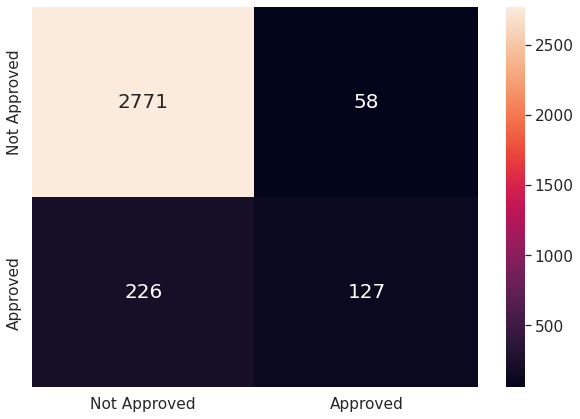

In [ ]:
df_cm = pd.DataFrame(cm)
df_cm.index = ['Not Approved', 'Approved']
df_cm.columns = ['Not Approved', 'Approved']
names=['Not Approved', 'Approved']
print(df_cm)
fig = plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,fmt="d",annot_kws={"size": 20})